# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold



# Exploración de archivos


Clase 0: 18118 ocurrencias
Clase 1: 556 ocurrencias
Clase 2: 1448 ocurrencias
Clase 3: 162 ocurrencias
Clase 4: 1608 ocurrencias


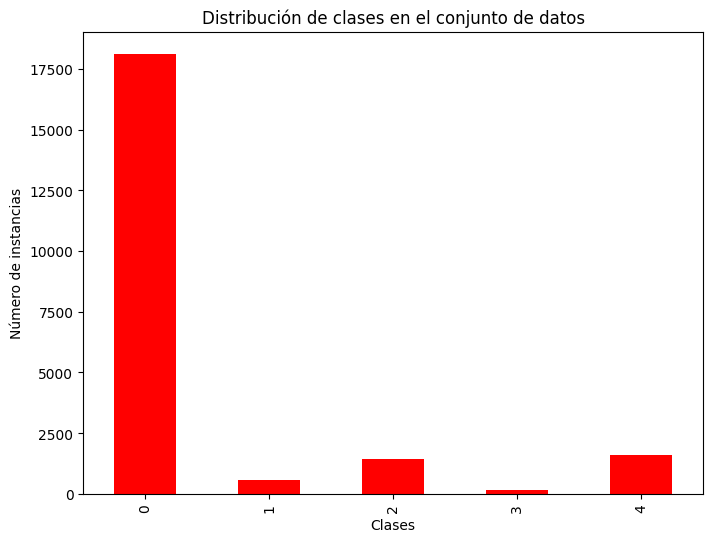

In [ ]:
df = pd.read_csv('sample_data/mitbih_test.csv', header=None)

counts = {i: 0 for i in range(5)}


for _, row in df.iterrows():
    value = int(row[187])
    if 0 <= value <= 5:
        counts[value] += 1

for value, count in counts.items():
    print(f"Clase {value}: {count} ocurrencias")


counts_series = pd.Series(counts)


plt.figure(figsize=(8, 6))
counts_series.plot(kind='bar', color='red')
plt.title('Distribución de clases en el conjunto de datos')
plt.xlabel('Clases')
plt.ylabel('Número de instancias')
plt.show()

Clase 0: 72471 ocurrencias
Clase 1: 2223 ocurrencias
Clase 2: 5788 ocurrencias
Clase 3: 641 ocurrencias
Clase 4: 6431 ocurrencias


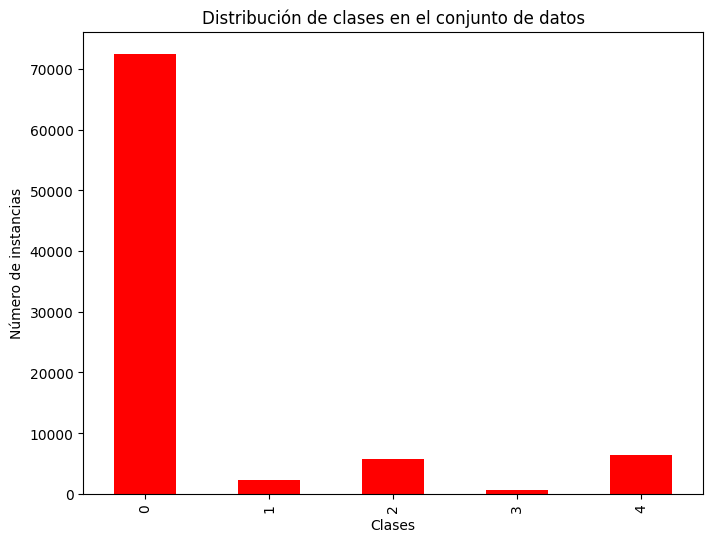

In [ ]:
df = pd.read_csv('sample_data/mitbih_train.csv', header=None)

counts = {i: 0 for i in range(5)}


for _, row in df.iterrows():
    value = int(row[187])
    if 0 <= value <= 5:
        counts[value] += 1

for value, count in counts.items():
    print(f"Clase {value}: {count} ocurrencias")


counts_series = pd.Series(counts)


plt.figure(figsize=(8, 6))
counts_series.plot(kind='bar', color='red')
plt.title('Distribución de clases en el conjunto de datos')
plt.xlabel('Clases')
plt.ylabel('Número de instancias')
plt.show()

Clase 0: 4046 ocurrencias
Clase 1: 0 ocurrencias
Clase 2: 0 ocurrencias
Clase 3: 0 ocurrencias
Clase 4: 0 ocurrencias


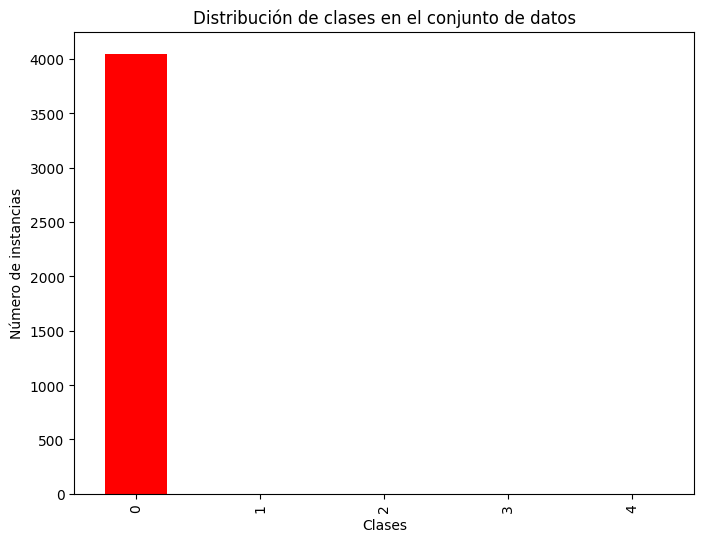

In [ ]:
df = pd.read_csv('sample_data/ptbdb_normal.csv', header=None)

counts = {i: 0 for i in range(5)}


for _, row in df.iterrows():
    value = int(row[187])
    if 0 <= value <= 5:
        counts[value] += 1

for value, count in counts.items():
    print(f"Clase {value}: {count} ocurrencias")


counts_series = pd.Series(counts)


plt.figure(figsize=(8, 6))
counts_series.plot(kind='bar', color='red')
plt.title('Distribución de clases en el conjunto de datos')
plt.xlabel('Clases')
plt.ylabel('Número de instancias')
plt.show()


Clase 0: 0 ocurrencias
Clase 1: 10506 ocurrencias
Clase 2: 0 ocurrencias
Clase 3: 0 ocurrencias
Clase 4: 0 ocurrencias


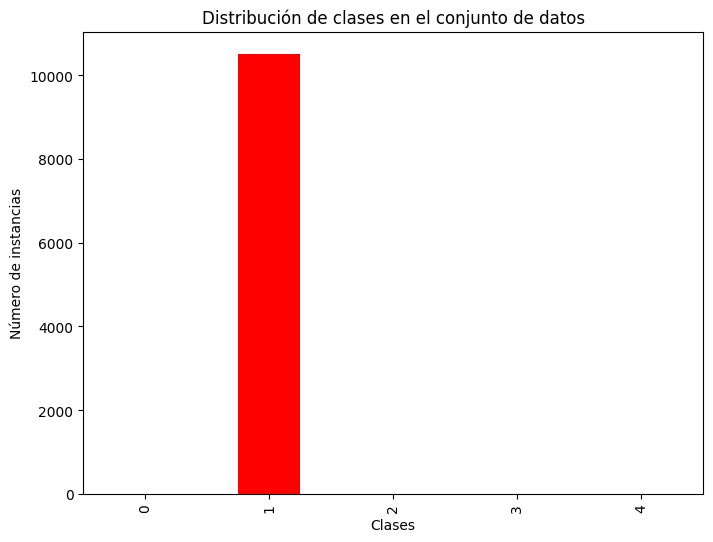

In [ ]:
df = pd.read_csv('sample_data/ptbdb_abnormal.csv', header=None)


counts = {i: 0 for i in range(5)}


for _, row in df.iterrows():
    value = int(row[187])
    if 0 <= value <= 5:
        counts[value] += 1

for value, count in counts.items():
    print(f"Clase {value}: {count} ocurrencias")


counts_series = pd.Series(counts)


plt.figure(figsize=(8, 6))
counts_series.plot(kind='bar', color='red')
plt.title('Distribución de clases en el conjunto de datos')
plt.xlabel('Clases')
plt.ylabel('Número de instancias')
plt.show()


# Visualización


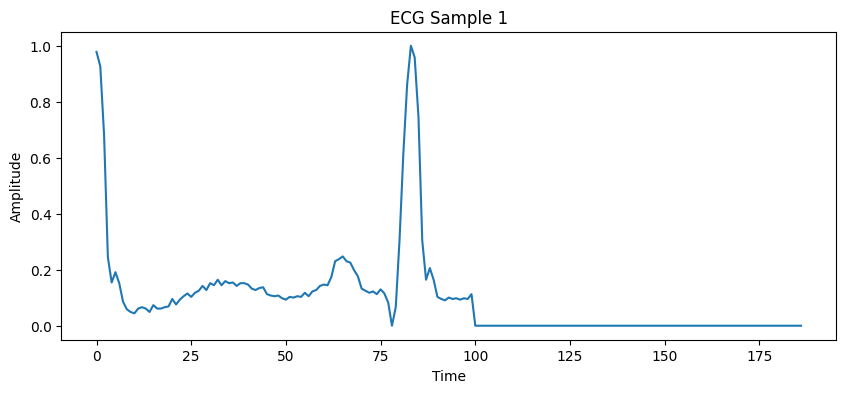

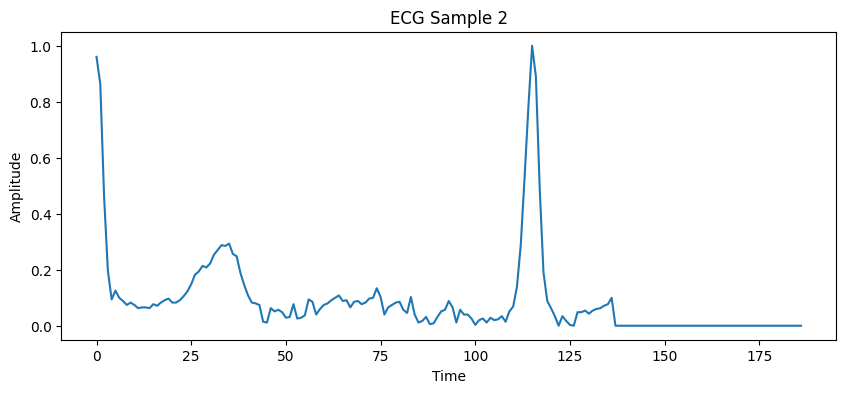

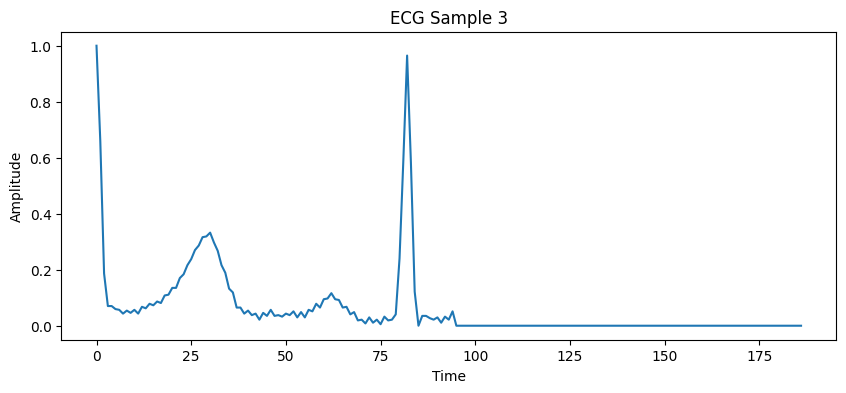

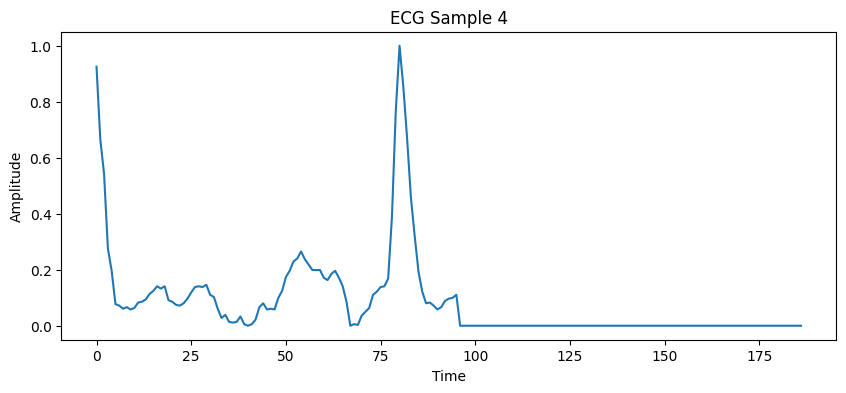

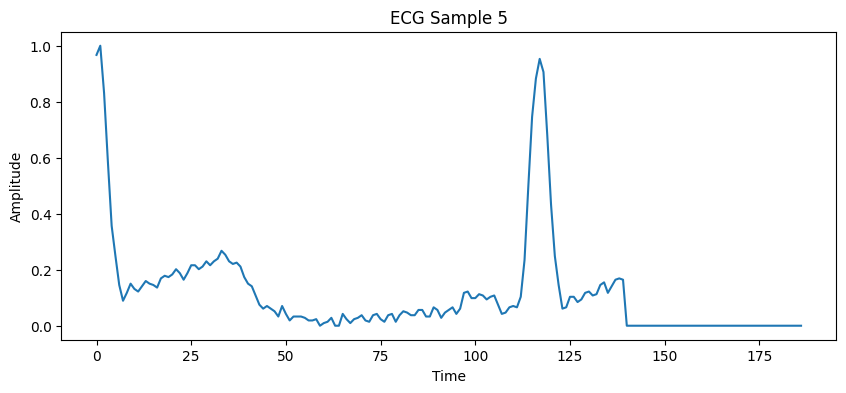

In [ ]:
df = pd.read_csv('sample_data/mitbih_train.csv', header=None)


for i in range(5):
    plt.figure(figsize=(10, 4))
    plt.plot(df.iloc[i, :-1])
    plt.title(f'ECG Sample {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()


# Limpieza,Verificación de normalización y datos nulos

In [ ]:
df = pd.read_csv('sample_data/mitbih_test.csv', header=None)

df.isnull().sum()
print(df.describe())

                0             1             2             3             4    \
count  21892.000000  21892.000000  21892.000000  21892.000000  21892.000000   
mean       0.894410      0.761902      0.426627      0.221596      0.201676   
std        0.234560      0.218659      0.228572      0.208711      0.177727   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.924260      0.683366      0.251197      0.050505      0.082873   
50%        0.990431      0.828996      0.432777      0.167630      0.147642   
75%        1.000000      0.912319      0.583991      0.347092      0.259211   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  21892.000000  21892.000000  21892.000000  21892.000000  21892.000000   
mean       0.209891      0.204805      0.200992      0.197634      0.196022   
std        0.172194      0.177946      0.176142    

In [ ]:
df = pd.read_csv('sample_data/mitbih_train.csv', header=None)

df.isnull().sum()
print(df.describe())

                0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240    

In [ ]:
df = pd.read_csv('sample_data/ptbdb_normal.csv', header=None)

df.isnull().sum()
print(df.describe())

               0            1            2            3            4    \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000   
mean      0.979670     0.711486     0.311677     0.119575     0.088608   
std       0.029061     0.186376     0.183457     0.110457     0.075760   
min       0.782178     0.121784     0.000000     0.000000     0.000000   
25%       0.964468     0.580160     0.164112     0.028731     0.027735   
50%       1.000000     0.726449     0.303266     0.092655     0.079476   
75%       1.000000     0.863699     0.436091     0.187527     0.134861   
max       1.000000     1.000000     0.985955     0.910798     0.846591   

               5            6            7            8            9    ...  \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000  ...   
mean      0.130843     0.159653     0.165608     0.168005     0.170783  ...   
std       0.081104     0.090131     0.096094     0.102506     0.106190  ...   
min       0.00000

In [ ]:
df = pd.read_csv('sample_data/ptbdb_abnormal.csv', header=None)


df.isnull().sum()
print(df.describe())

                0             1             2             3             4    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.975468      0.725582      0.438306      0.290384      0.252897   
std        0.036354      0.199030      0.262699      0.270977      0.237004   
min        0.624227      0.000000      0.000000      0.000000      0.000000   
25%        0.957325      0.586602      0.236455      0.074064      0.088487   
50%        1.000000      0.745646      0.404297      0.212845      0.173046   
75%        1.000000      0.890043      0.620889      0.427811      0.343089   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.249423      0.245668      0.247160      0.250203      0.252396   
std        0.211751      0.200159      0.194840    

# Prueba del primero modelo

## Regresión logistica sin balanceo

In [ ]:
df = pd.read_csv('sample_data/mitbih_train.csv', header=None)

X = df.iloc[:, :187]
y = df[187]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


log_reg = LogisticRegression(max_iter=1000, random_state=42)


cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')


print(f'Precisión promedio con validación cruzada: {cv_scores.mean()}')
print(f'Precisión en cada partición de la validación cruzada: {cv_scores}')

Precisión del modelo: 0.9139604827349906
Precisión promedio con validación cruzada: 0.9131952967948511
Precisión en cada partición de la validación cruzada: [0.91164953 0.91458639 0.91147915 0.91539528 0.91286612]


In [ ]:
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     21828
         1.0       0.85      0.39      0.53       627
         2.0       0.64      0.33      0.43      1704
         3.0       0.63      0.20      0.30       200
         4.0       0.95      0.88      0.92      1908

    accuracy                           0.91     26267
   macro avg       0.80      0.56      0.63     26267
weighted avg       0.90      0.91      0.90     26267



Matriz de confusión:
[[21486    33   252     4    53]
 [  355   243    26     1     2]
 [ 1093    11   554    18    28]
 [  146     0    14    40     0]
 [  202     0    22     0  1684]]


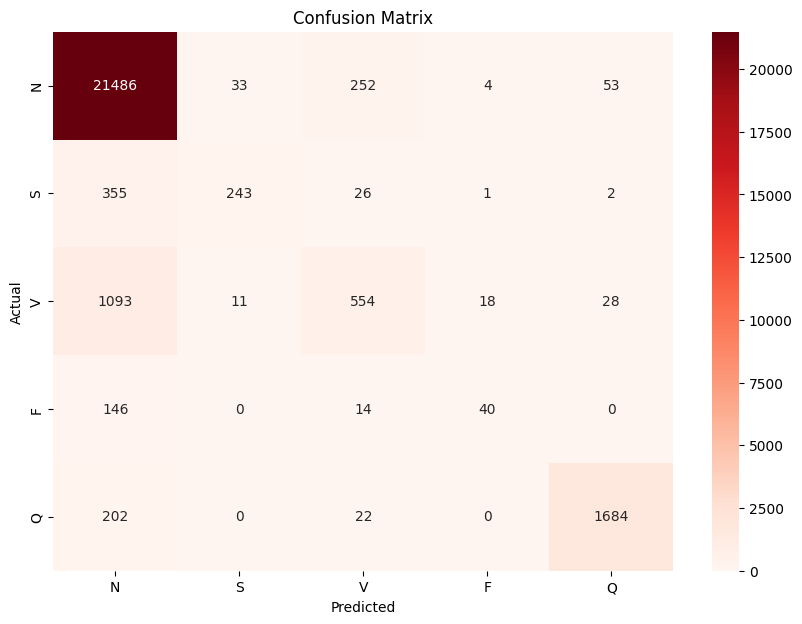

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de confusión:")
print(conf_matrix)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=["N", "S", "V", "F", "Q"], yticklabels=["N", "S", "V", "F", "Q"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Modelos

## 7 modelos balanceados por RandomUnderSample

Evaluando modelo: Random Forest
Precisión promedio para Random Forest: 0.8511

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91     14452
         1.0       0.34      0.80      0.47       465
         2.0       0.62      0.92      0.74      1183
         3.0       0.13      0.88      0.22       127
         4.0       0.91      0.95      0.93      1283

    accuracy                           0.86     17510
   macro avg       0.59      0.88      0.65     17510
weighted avg       0.93      0.86      0.88     17510



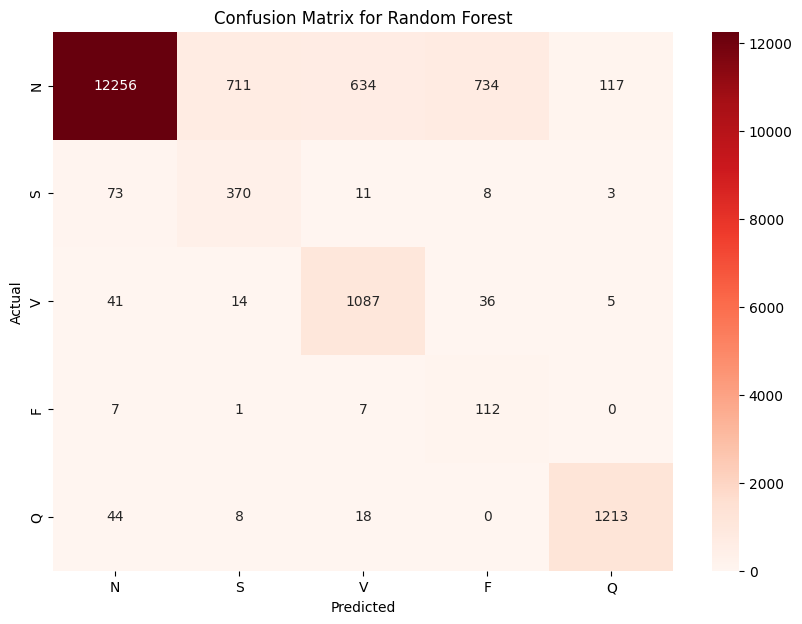

Evaluando modelo: SVM
Precisión promedio para SVM: 0.8082

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88     14452
         1.0       0.33      0.75      0.46       465
         2.0       0.59      0.86      0.70      1183
         3.0       0.08      0.87      0.14       127
         4.0       0.83      0.91      0.87      1283

    accuracy                           0.81     17510
   macro avg       0.56      0.84      0.61     17510
weighted avg       0.92      0.81      0.85     17510



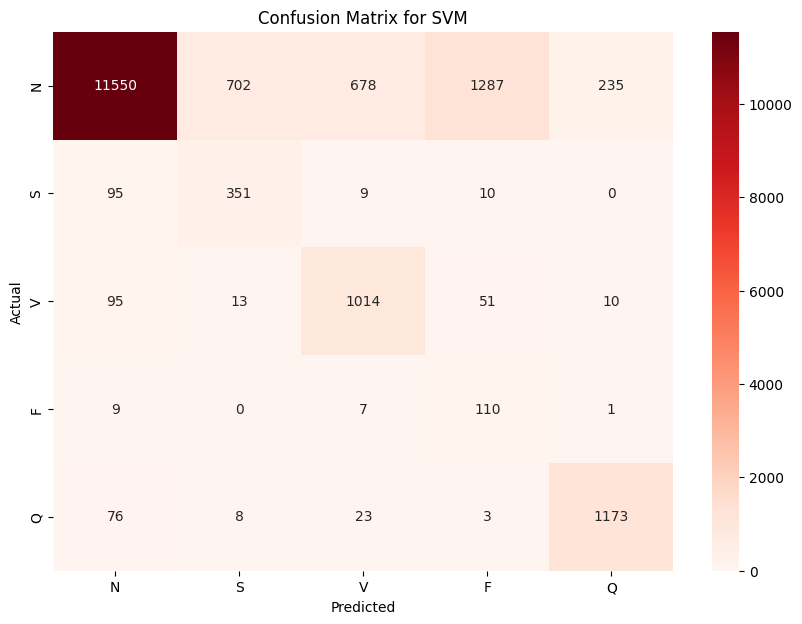

Evaluando modelo: K-Nearest Neighbors
Precisión promedio para K-Nearest Neighbors: 0.7586

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84     14452
         1.0       0.19      0.81      0.31       465
         2.0       0.51      0.84      0.63      1183
         3.0       0.09      0.88      0.16       127
         4.0       0.77      0.93      0.85      1283

    accuracy                           0.76     17510
   macro avg       0.51      0.84      0.56     17510
weighted avg       0.91      0.76      0.81     17510



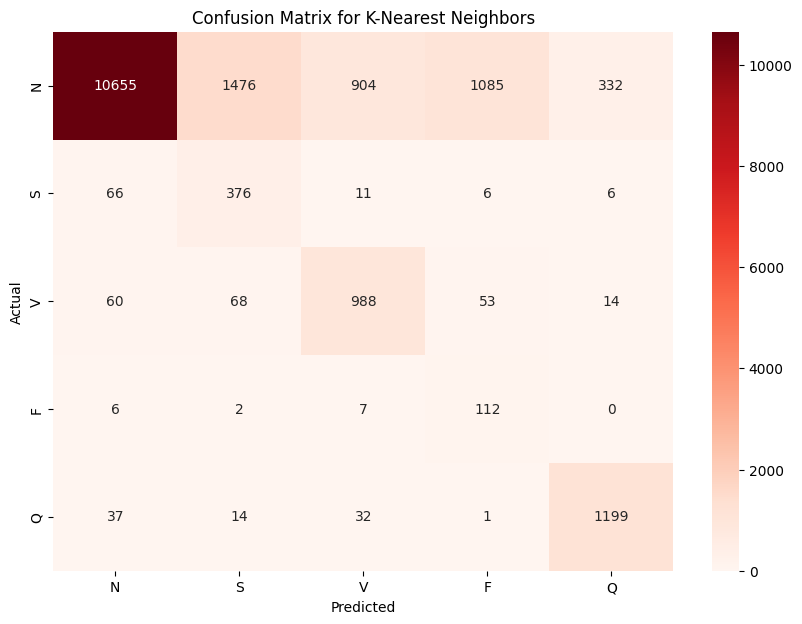

Evaluando modelo: Decision Tree
Precisión promedio para Decision Tree: 0.7101

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.80     14452
         1.0       0.14      0.77      0.23       465
         2.0       0.47      0.79      0.59      1183
         3.0       0.08      0.83      0.15       127
         4.0       0.64      0.90      0.75      1283

    accuracy                           0.70     17510
   macro avg       0.46      0.79      0.50     17510
weighted avg       0.89      0.70      0.76     17510



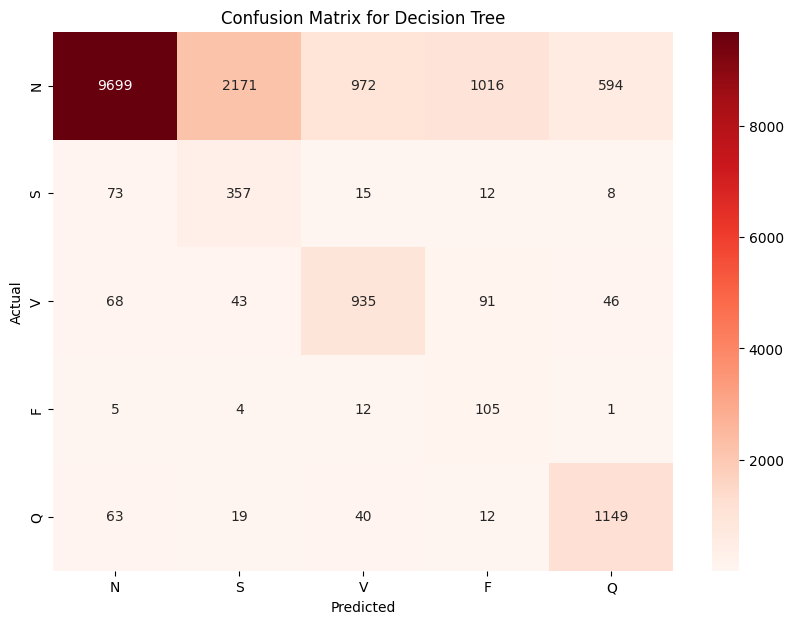

Evaluando modelo: Naive Bayes
Precisión promedio para Naive Bayes: 0.1792

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.12      0.22     14452
         1.0       0.52      0.08      0.14       465
         2.0       0.22      0.19      0.20      1183
         3.0       0.00      0.00      0.00       127
         4.0       0.09      1.00      0.16      1283

    accuracy                           0.19     17510
   macro avg       0.35      0.28      0.14     17510
weighted avg       0.80      0.19      0.21     17510



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


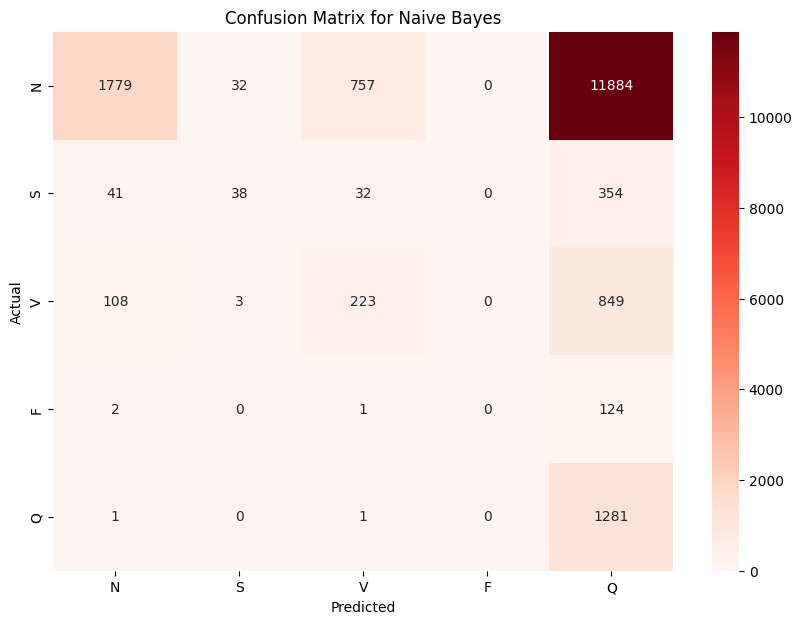

Evaluando modelo: Gradient Boosting
Precisión promedio para Gradient Boosting: 0.7945

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     14452
         1.0       0.24      0.80      0.37       465
         2.0       0.56      0.89      0.69      1183
         3.0       0.09      0.87      0.17       127
         4.0       0.85      0.93      0.89      1283

    accuracy                           0.80     17510
   macro avg       0.55      0.86      0.60     17510
weighted avg       0.92      0.80      0.84     17510



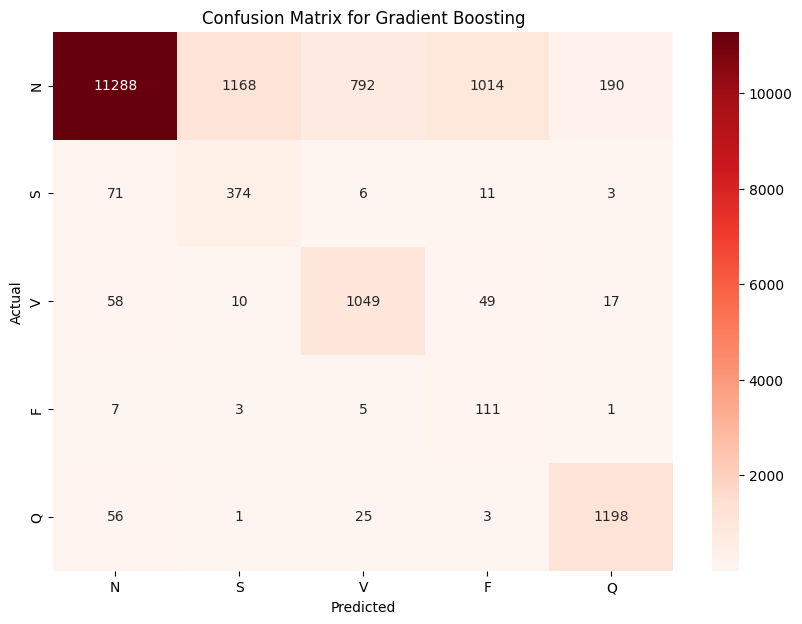

Evaluando modelo: AdaBoost
Precisión promedio para AdaBoost: 0.4800

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.93      0.36      0.51     14452
         1.0       0.05      0.55      0.09       465
         2.0       0.25      0.62      0.35      1183
         3.0       0.06      0.83      0.11       127
         4.0       0.65      0.90      0.75      1283

    accuracy                           0.42     17510
   macro avg       0.39      0.65      0.36     17510
weighted avg       0.83      0.42      0.51     17510



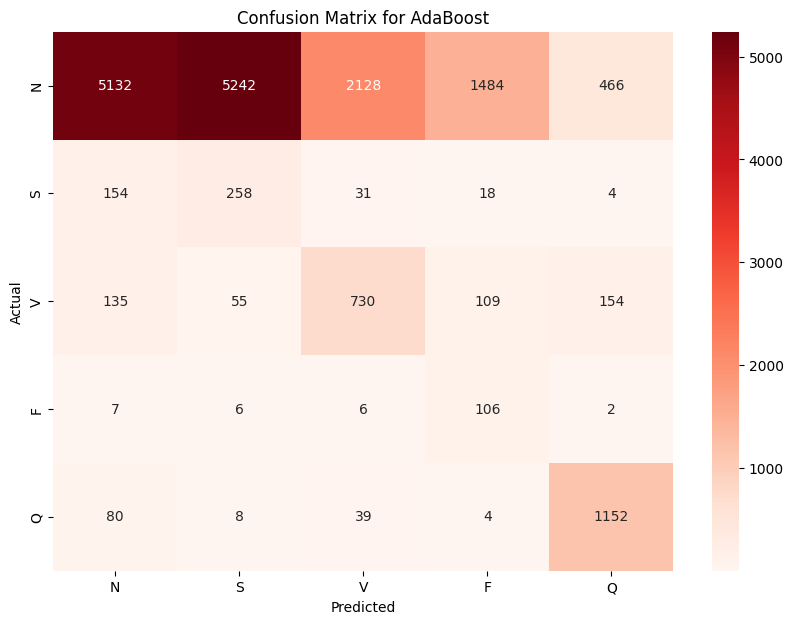


El modelo más efectivo es: Random Forest con una precisión promedio de 0.8511


In [ ]:
df = pd.read_csv('sample_data/mitbih_train.csv', header=None)

X = df.iloc[:, :187].values
y = df[187].values

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}


results = {}


for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")

    accuracy_total = 0


    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
        X_res, y_res = undersample.fit_resample(X_train, y_train)


        model.fit(X_res, y_res)


        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_total += accuracy


    accuracy_avg = accuracy_total / n_folds
    results[model_name] = accuracy_avg
    print(f"Precisión promedio para {model_name}: {accuracy_avg:.4f}\n")


    report = classification_report(y_test, y_pred)
    print("Reporte de clasificación:")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=["N", "S", "V", "F", "Q"], yticklabels=["N", "S", "V", "F", "Q"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


best_model_name = max(results, key=results.get)
print(f"\nEl modelo más efectivo es: {best_model_name} con una precisión promedio de {results[best_model_name]:.4f}")

## SMOTE ramdonForest

In [ ]:
from imblearn.over_sampling import SMOTE

df = pd.read_csv('sample_data/mitbih_train.csv', header=None)

X = df.iloc[:, :187].values
y = df[187].values

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


model_name = 'Random Forest'
model = RandomForestClassifier(random_state=42)

accuracy_total = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)


    model.fit(X_res, y_res)


    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_total += accuracy


accuracy_avg = accuracy_total / n_folds
print(f"Precisión promedio para {model_name}: {accuracy_avg:.4f}\n")


report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=["N", "S", "V", "F", "Q"], yticklabels=["N", "S", "V", "F", "Q"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

# Solución

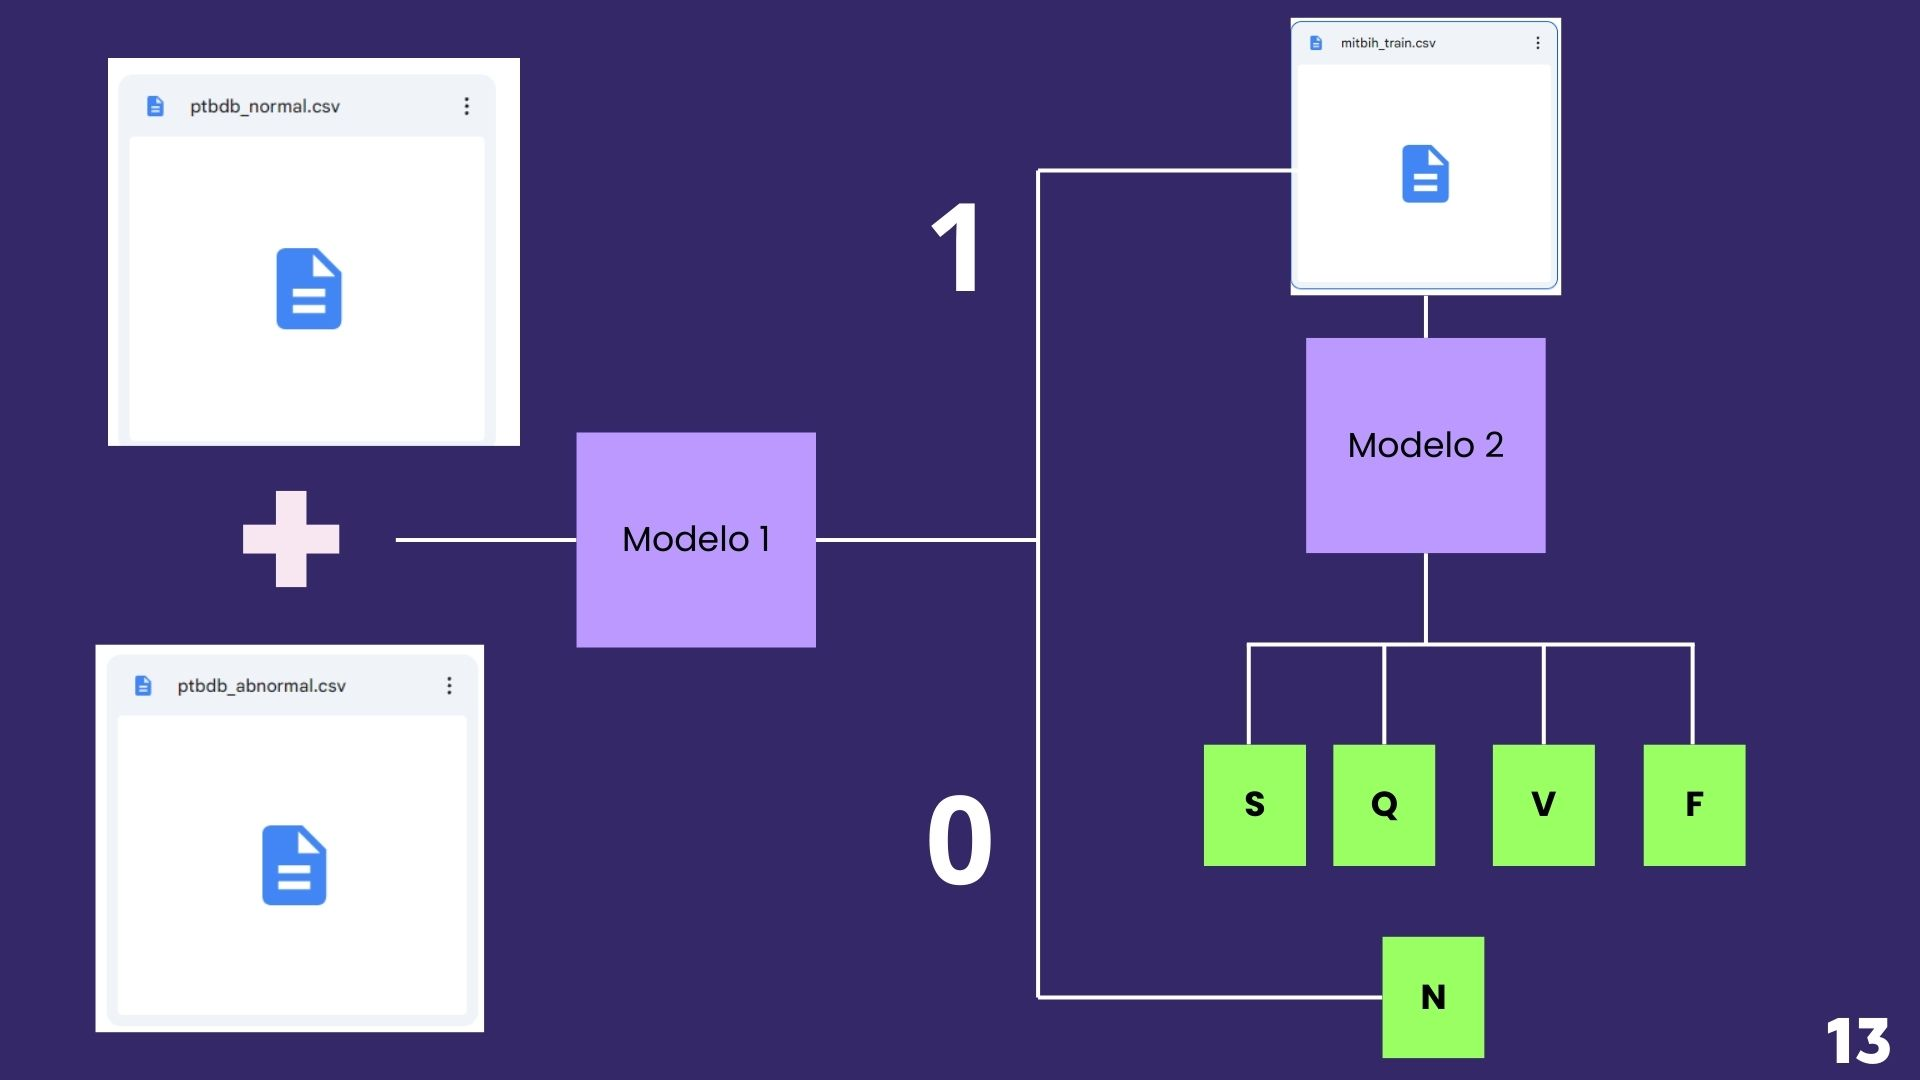

## Modelo 1 = Normal + Abnormal

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df_normal = pd.read_csv('sample_data/ptbdb_normal.csv', header=None)
df_abnormal = pd.read_csv('sample_data/ptbdb_abnormal.csv', header=None)

df_normal[187] = 0
df_abnormal[187] = 1

df_combined = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)

X = df_combined.iloc[:, :187]
y = df_combined[187]

### Balanceo mediante observaciones normales de mitbih_train

In [ ]:
df_mitbih = pd.read_csv('sample_data/mitbih_train.csv', header=None)

df_mitbih_normal = df_mitbih[df_mitbih[187] == 0]

normales_faltantes = 2000

df_mitbih_normal_extra = df_mitbih_normal.sample(n=normales_faltantes, random_state=42)

df_combined_balanced = pd.concat([df_combined, df_mitbih_normal_extra], axis=0).reset_index(drop=True)

X_balanced = df_combined_balanced.iloc[:, :187]
y_balanced = df_combined_balanced[187]


class_counts_balanced = y_balanced.value_counts()
print("Número de ejemplos por clase después de balancear:")
for cls, count in class_counts_balanced.items():
    print(f"Clase {cls}: {count} ejemplos")

Número de ejemplos por clase después de balancear:
Clase 1.0: 10506 ejemplos
Clase 0.0: 6046 ejemplos


### Entrenamiento

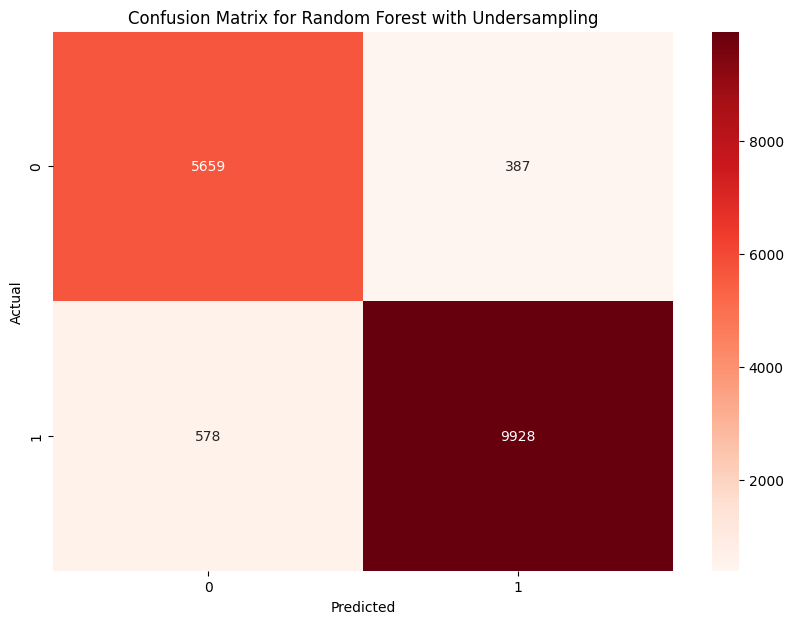


Reporte de Clasificación - Random Forest con Undersampling:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      6046
         1.0       0.96      0.94      0.95     10506

    accuracy                           0.94     16552
   macro avg       0.93      0.94      0.94     16552
weighted avg       0.94      0.94      0.94     16552

Exactitud (Accuracy): 0.94


In [ ]:
X_balanced = df_combined_balanced.iloc[:, :187]
y_balanced = df_combined_balanced[187]


under_sampler = RandomUnderSampler(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true = []
y_pred = []


for train_index, test_index in cv.split(X_balanced, y_balanced):
    X_train, X_test = X_balanced.iloc[train_index], X_balanced.iloc[test_index]
    y_train, y_test = y_balanced.iloc[train_index], y_balanced.iloc[test_index]


    X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)


    random_forest_model.fit(X_train_under, y_train_under)


    y_pred_fold = random_forest_model.predict(X_test)


    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)


y_true = pd.Series(y_true)
y_pred = pd.Series(y_pred)


conf_matrix_rf = confusion_matrix(y_true, y_pred)
report_rf = classification_report(y_true, y_pred)
accuracy_rf = accuracy_score(y_true, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Random Forest with Undersampling')
plt.show()


print("\nReporte de Clasificación - Random Forest con Undersampling:")
print(report_rf)
print(f"Exactitud (Accuracy): {accuracy_rf:.2f}")


### Prueba con mitbih_test

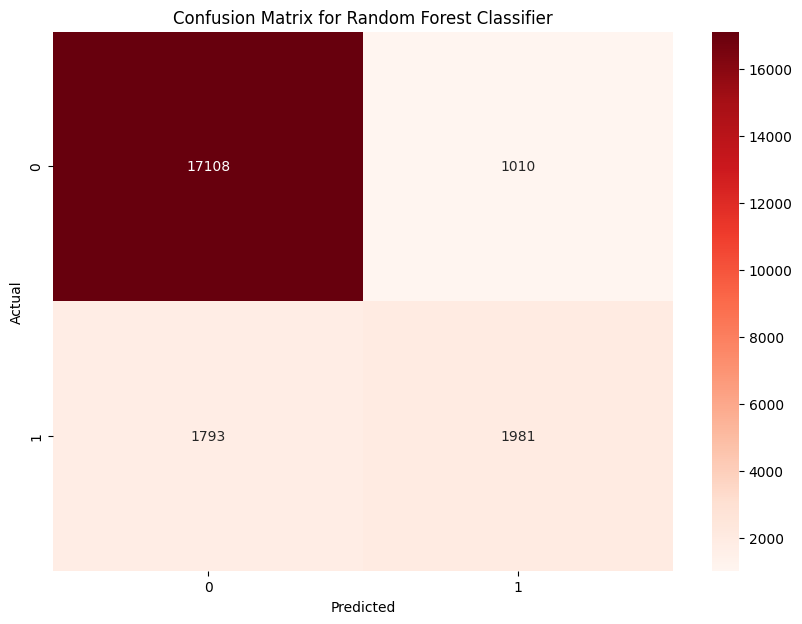


Reporte de Clasificación mitbih_test - Random Forest:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92     18118
         1.0       0.66      0.52      0.59      3774

    accuracy                           0.87     21892
   macro avg       0.78      0.73      0.75     21892
weighted avg       0.86      0.87      0.87     21892

Exactitud (Accuracy): 0.87


In [20]:
df_test = pd.read_csv('sample_data/mitbih_test.csv', header=None)


X_test = df_test.iloc[:, :187]
y_test = df_test[187]


y_test = y_test.replace({2: 1, 3: 1, 4: 1})


random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_balanced, y_balanced)


y_pred_test = random_forest_model.predict(X_test)


conf_matrix_test = confusion_matrix(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


print("\nReporte de Clasificación mitbih_test - Random Forest:")
print(report_test)
print(f"Exactitud (Accuracy): {accuracy_test:.2f}")


## Modelo 2

In [13]:
df = pd.read_csv('sample_data/mitbih_train.csv', header=None)

X = df.iloc[:, :187]
y = df[187]

In [14]:
mask = y != 0
X_filtered = X[mask]
y_filtered = y[mask]


df_abnormal = df[mask]


print(X_filtered.shape)
print(y_filtered.shape)


(15083, 187)
(15083,)


In [15]:
X = df_abnormal.iloc[:, :187]
y = df_abnormal[187]

### Entrenamiento

In [17]:
from sklearn.model_selection import cross_val_predict


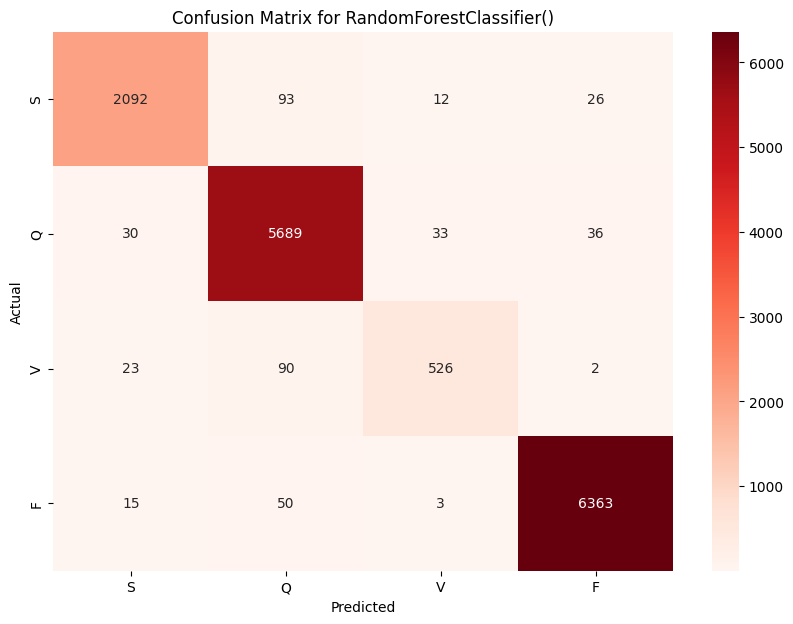


Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.95      2223
         2.0       0.96      0.98      0.97      5788
         3.0       0.92      0.82      0.87       641
         4.0       0.99      0.99      0.99      6431

    accuracy                           0.97     15083
   macro avg       0.96      0.93      0.95     15083
weighted avg       0.97      0.97      0.97     15083

Exactitud (Accuracy): 0.97


In [18]:
random_forest_model = RandomForestClassifier()


y_pred_rf = cross_val_predict(random_forest_model, X, y, cv=5)


conf_matrix_rf = confusion_matrix(y, y_pred_rf)


report_rf = classification_report(y, y_pred_rf)
accuracy_rf = accuracy_score(y, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds', xticklabels=[ "S","Q","V","F"], yticklabels=["S","Q","V","F"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {random_forest_model}')
plt.show()
print("\nReporte de Clasificación - Regresión Logística:")
print(report_rf)
print(f"Exactitud (Accuracy): {accuracy_rf:.2f}")

### Prueba con mitbih_test

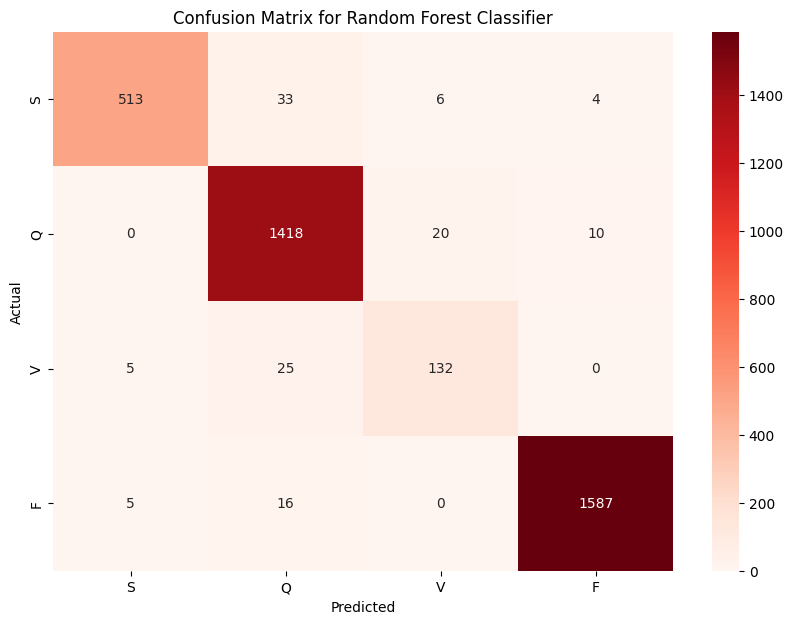


Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       556
         2.0       0.95      0.98      0.96      1448
         3.0       0.84      0.81      0.82       162
         4.0       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.94      0.93      0.93      3774
weighted avg       0.97      0.97      0.97      3774

Exactitud (Accuracy): 0.97


In [19]:
df_test = pd.read_csv('sample_data/mitbih_test.csv', header=None)


X_test = df_test.iloc[:, :187]
y_test = df_test[187]


mask_test = y_test != 0
X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]


random_forest_model.fit(X, y)


y_pred_test = random_forest_model.predict(X_test_filtered)


conf_matrix_test = confusion_matrix(y_test_filtered, y_pred_test)
report_test = classification_report(y_test_filtered, y_pred_test)
accuracy_test = accuracy_score(y_test_filtered, y_pred_test)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', xticklabels=["S", "Q", "V", "F"], yticklabels=["S", "Q", "V", "F"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.show()


print("\nReporte de Clasificación - Random Forest:")
print(report_test)
print(f"Exactitud (Accuracy): {accuracy_test:.2f}")

# Ramdom forest hiperparametros


In [21]:
df_mitbih = pd.read_csv('sample_data/mitbih_train.csv', header=None)

df_mitbih_normal = df_mitbih[df_mitbih[187] == 0]

normales_faltantes = 6460

df_mitbih_normal_extra = df_mitbih_normal.sample(n=normales_faltantes, random_state=42)

df_combined_balanced = pd.concat([df_combined, df_mitbih_normal_extra], axis=0).reset_index(drop=True)

X_balanced = df_combined_balanced.iloc[:, :187]
y_balanced = df_combined_balanced[187]


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_balanced, y_balanced)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {best_params}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores parámetros: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
y_pred_best_rf_random = cross_val_predict(best_model, X_balanced, y_balanced, cv=5)
conf_matrix_best_rf_random = confusion_matrix(y_balanced, y_pred_best_rf_random)
report_best_rf_random = classification_report(y_balanced, y_pred_best_rf_random)
accuracy_best_rf_random = accuracy_score(y_balanced, y_pred_best_rf_random)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best_rf_random, annot=True, fmt='d', cmap='Reds', xticklabels=["N","AB"], yticklabels=["N","AB"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model}')
plt.show()
print("\nReporte de Clasificación - Random Forest con Mejor Parámetro (Randomized Search):")
print(report_best_rf_random)
print(f"Exactitud (Accuracy): {accuracy_best_rf_random:.2f}")


## mas hiperparametros

In [ ]:
import pandas as pd


df_normal = pd.read_csv('sample_data/ptbdb_normal.csv', header=None)
df_abnormal = pd.read_csv('sample_data/ptbdb_abnormal.csv', header=None)


df_normal[187] = 0
df_abnormal[187] = 1


df_combined = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)


X = df_combined.iloc[:, :187]
y = df_combined[187]


class_counts = y.value_counts()

print("Número de ejemplos por clase:")
for cls, count in class_counts.items():
    print(f"Clase {cls}: {count} ejemplos")




Número de ejemplos por clase:
Clase 1: 10506 ejemplos
Clase 0: 4046 ejemplos


In [ ]:
df_mitbih = pd.read_csv('sample_data/mitbih_train.csv', header=None)

df_mitbih_normal = df_mitbih[df_mitbih[187] == 0]

normales_faltantes = 6460

df_mitbih_normal_extra = df_mitbih_normal.sample(n=normales_faltantes, random_state=42)

df_combined_balanced = pd.concat([df_combined, df_mitbih_normal_extra], axis=0).reset_index(drop=True)

X_balanced = df_combined_balanced.iloc[:, :187]
y_balanced = df_combined_balanced[187]


### No corrio, mucho costo computacional requerido

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', {0: 1, 1: 4}]
}


rf_model = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_balanced, y_balanced)


print(f"Mejores parámetros encontrados: {grid_search.best_params_}")


best_model = grid_search.best_estimator_
y_pred_test_best = best_model.predict(X_test)


conf_matrix_test_best = confusion_matrix(y_test, y_pred_test_best)
report_test_best = classification_report(y_test, y_pred_test_best)
accuracy_test_best = accuracy_score(y_test, y_pred_test_best)

print("\nReporte de Clasificación con el Mejor Modelo:")
print(report_test_best)
print(f"Exactitud (Accuracy) con el Mejor Modelo: {accuracy_test_best:.2f}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
